In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from functions.LoadingData import LoadData
%matplotlib inline

### Load the data

Shape of DataFrame is (418, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


None


Head of DataFrame:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



Dataset statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200



Number of NaN values in DataFrame:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Number of duplicates in DataFrame:


0


Visualisation of missing values in data set:


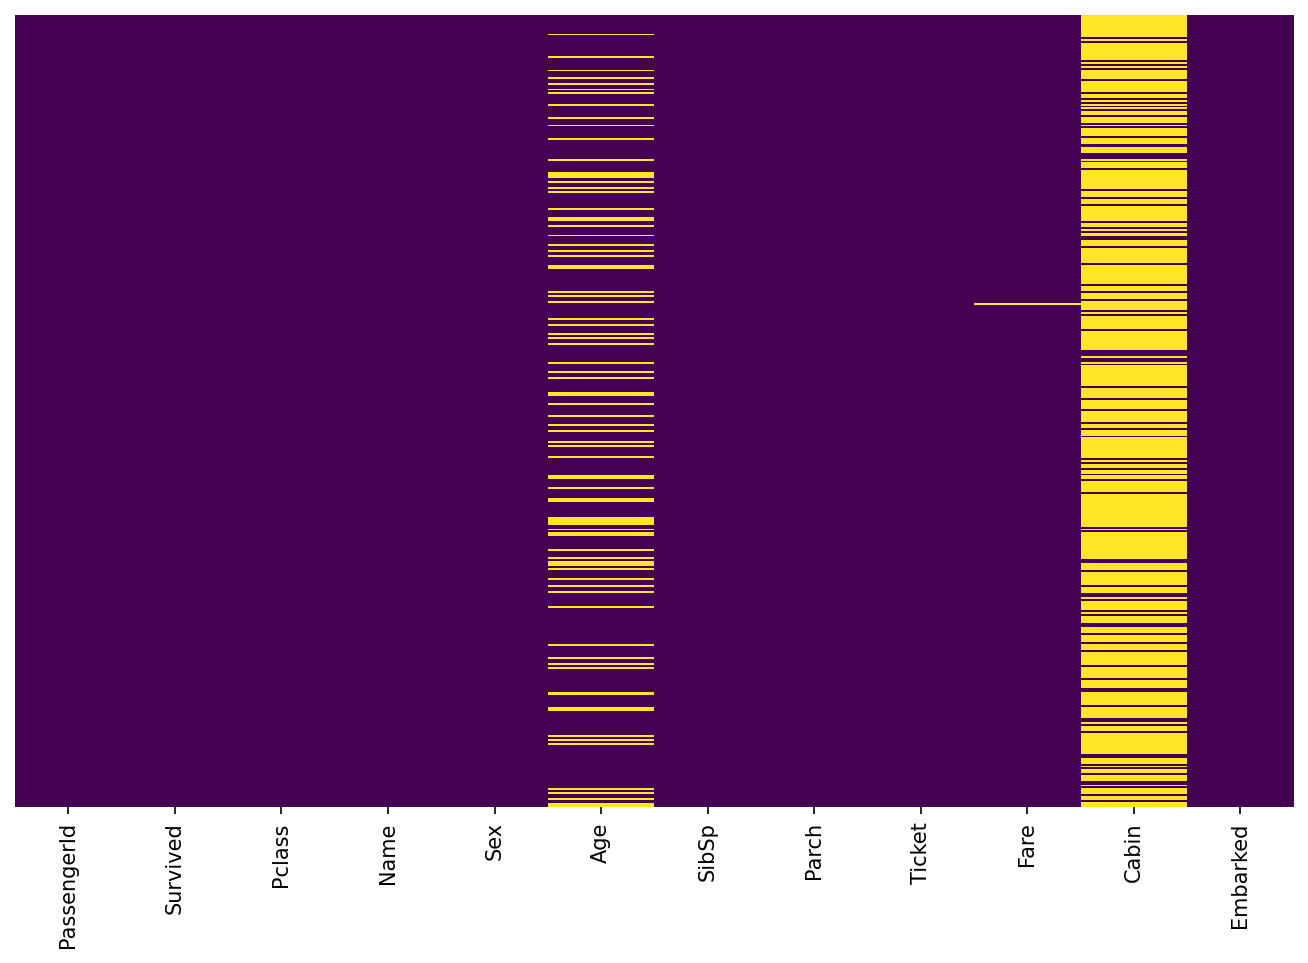

In [143]:
d = LoadData('data/tested.csv')
titanic = d.create_data()

As we can see cabin column have many missing values, we are going to delete this column.

In [144]:
titanic.drop('Cabin', axis=1, inplace=True)

In [145]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [146]:
titanic['Name'].nunique()

418

We are going to delete also Name column, its not going to improve our machine learning model because every single value is unique, also passenger id is original fo every single passenger so it brings no value to model.

In [147]:
titanic.drop(['Name', 'PassengerId'], axis=1, inplace=True)

Now lets look at Age column there are some missing values but we can sort it out with missing data techniques.

In [148]:
titanic['Age'].isnull().sum()

86

In [149]:
titanic['Age'].mean()

30.272590361445783

In [150]:
titanic.rename(columns={'SibSp':'NumberOfSiblings'},inplace=True)

In [151]:
titanic.fillna(value={'Age': int(titanic['Age'].mean())}, inplace=True)
titanic.drop('Ticket',axis=1,inplace=True)

In [152]:
titanic.head()

,Survived,Pclass,Sex,Age,NumberOfSiblings,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [153]:
pclass_dummies = pd.get_dummies(titanic['Pclass'])
pclass_dummies.rename({1:'Pclass1', 2:'Pclass2', 3: 'Pclass3'},inplace=True, axis=1)
pclass_dummies.head()

,Pclass1,Pclass2,Pclass3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [154]:
dummies_sex = pd.get_dummies(titanic['Sex'])
dummies_sex.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


<AxesSubplot:xlabel='Pclass', ylabel='count'>

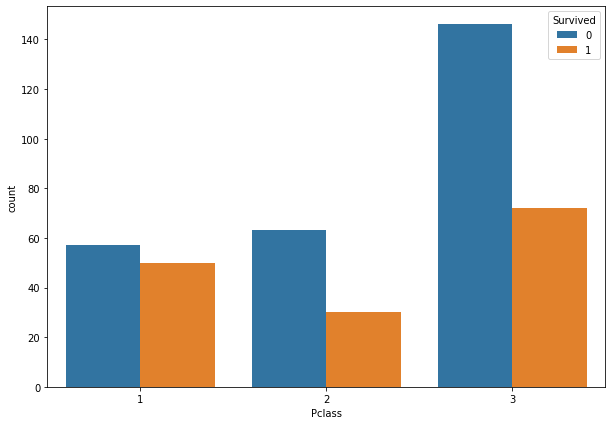

In [155]:
plt.figure(figsize=(10,7))
sns.countplot(data=titanic, x='Pclass',hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

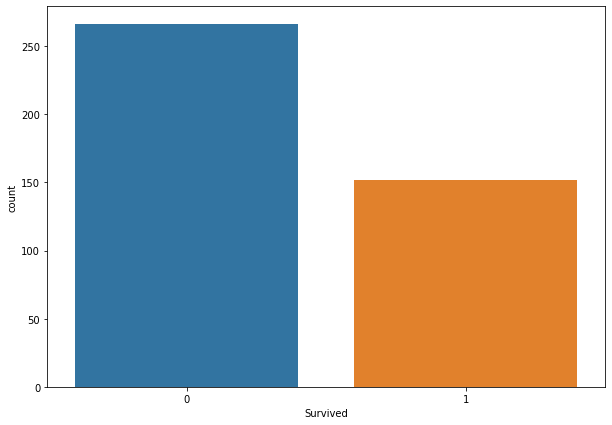

In [156]:
plt.figure(figsize=(10,7))
sns.countplot(data=titanic, x='Survived')

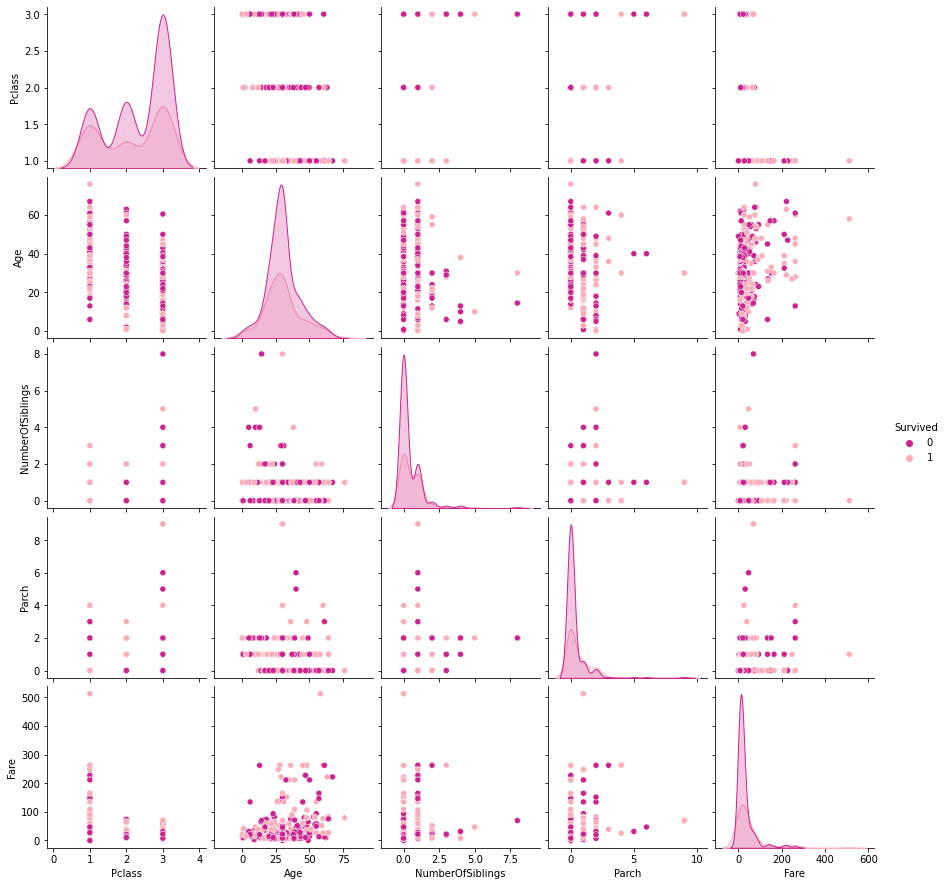

In [157]:
sns.pairplot(data=titanic, hue='Survived', palette='RdPu_r')

<AxesSubplot:xlabel='NumberOfSiblings', ylabel='count'>

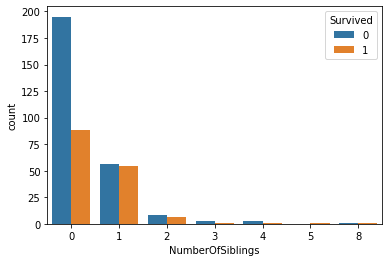

In [158]:
sns.countplot(data=titanic, x='NumberOfSiblings',hue='Survived')

In [159]:
embarked_dummies = pd.get_dummies(titanic['Embarked'])
embarked_dummies.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [160]:
titanic.drop(columns=['Embarked', 'Pclass', 'Sex'],inplace=True)

In [161]:
titanic = titanic.join([pclass_dummies, embarked_dummies, dummies_sex])

In [162]:
titanic.head()

,Survived,Age,NumberOfSiblings,Parch,Fare,Pclass1,Pclass2,Pclass3,C,Q,S,female,male
0,0,34.5,0,0,7.8292,0,0,1,0,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,0,1,1,0
2,0,62.0,0,0,9.6875,0,1,0,0,1,0,0,1
3,0,27.0,0,0,8.6625,0,0,1,0,0,1,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,0,1,1,0


### Creating Logistic Regression model

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [164]:
titanic.dropna(axis=0,inplace=True)
titanic.isna().sum()

Survived            0
Age                 0
NumberOfSiblings    0
Parch               0
Fare                0
Pclass1             0
Pclass2             0
Pclass3             0
C                   0
Q                   0
S                   0
female              0
male                0
dtype: int64

Spliting data and creating a model

In [165]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',
                                    axis=1).values,
                                    titanic['Survived'].values,
                                    test_size=0.3,
                                    random_state=42)
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(C=0.5))

In [166]:
cross_val_score(logistic_model, X_train, y_train)

array([1., 1., 1., 1., 1.])

In [167]:
logistic_model.fit(X_train,y_train)
logistic_model.score(X_train,y_train)

1.0

In [168]:
prediction = logistic_model.predict(X_test)

In [169]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        47

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [170]:
confusion_matrix(y_test, prediction)

array([[79,  0],
       [ 0, 47]], dtype=int64)

As we can see model did perfect predictions on test data we have only true positives and true negatives